# Plot tip shape

In [24]:
import matplotlib
import matplotlib.pyplot as plt
from classes.Case import Case
import numpy as np

In [25]:
from matplotlib import interactive

interactive(True)

In [26]:
font = {'family' : 'Times New Roman',
        'size'   : 11}

matplotlib.rc('font', **font)

## FVM results

In [27]:
import pandas as pd

miha_data = pd.read_csv('../data/miha_tip_shape_t_6.csv', delimiter=",", decimal=".")

## Single file

In [28]:
# Save file content to object.
file = 'ball_0.0005_pu_12_wls_0.1_0.3.h5'
file = 'results.h5'
file = 'box_0.0001_pu_6_wls_0.05_0.15.h5'
input_file = "../data/{}".format(file)
data = Case(input_file)

Loading data from ../data/box_0.0001_pu_6_wls_0.05_0.15.h5 ...


In [29]:
time = 6
idx = data.times.index(time)
positions = data.positions[idx]

# Extract only dendrite boundary. Only one quearter please.
envelope_position_idx = list([i for i in range(len(data.types[idx])) if data.types[idx][i] == -2 and positions[0][i] >= 0 and positions[1][i] >= 0])
envelope_positions = positions[:, envelope_position_idx]

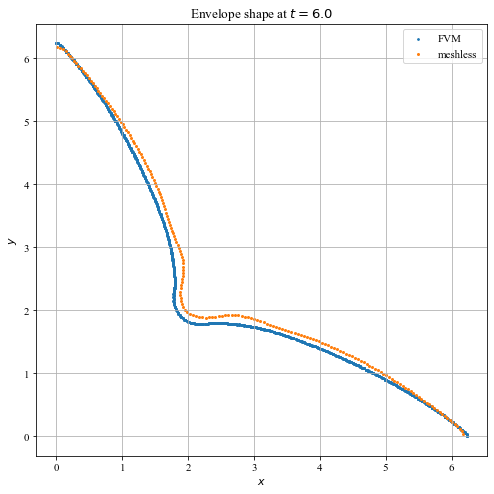

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# FVM
ax.scatter(miha_data['Points_0'], miha_data['Points_1'], s=3, label = "FVM")

## Meshless
ax.scatter(envelope_positions[0], envelope_positions[1], s=4, label = "meshless")

# PLot metadata
ax.set_title("Envelope shape at $t={:.1f}$".format(time))
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.grid("both")
ax.legend()

plt.tight_layout()

if 1:
    plt.savefig('../results/tip_shape.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()